
The total number of data point (FFT grid in real space) is
64.0 64.0 720.0 2949120.0

Sum of charge densities in the CHG file is
707789676.3385962

Divided by the number of grid is, which is total number of charge
Check this number corresponds to the total number of electron in your calculation.
240.00029715257304 number of electrons

Divided by the volume (A^3), that is the average charge density in the system.
0.341952848396391 e/A^3

Sum of planar chargen density along z direction divided by the number of grid. Should be the total number of electrons.
240.00029715319423 number of electrons.



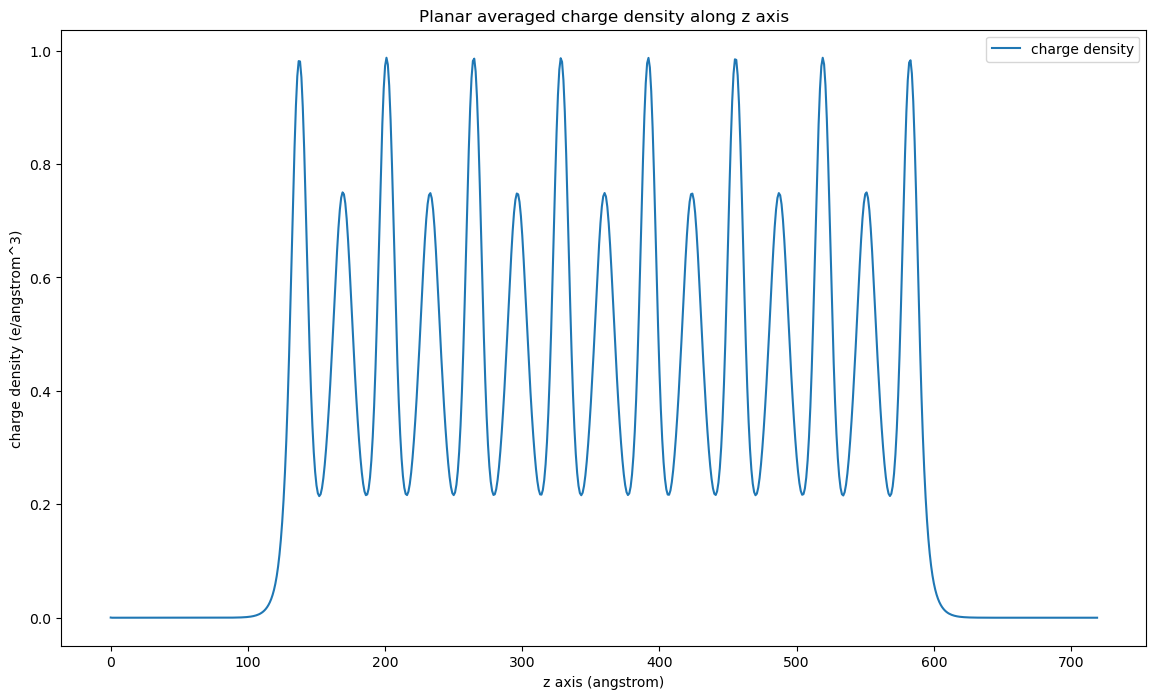

In [38]:
###
# Read CHG file to analyze a charge density. Under development.
###

import numpy as np
import matplotlib.pyplot as plt

filename = './VASP_files/CHG'  # Specify the file path of CHG format file.
# filename = 'chg_test.txt'  # Replace 'your_file.txt' with the actual file path

# Read the file and store lines in a list
with open(filename, 'r') as file:
    lines = file.readlines() # The file is read in the variable lines.

# Define the indices. All the indices are just integer.
lattice_a_index = 2
lattice_b_index = 3
lattice_c_index = 4
num_of_atom_index = lines.index("Direct\n") - 1
num_of_atom = int(np.sum(np.fromstring(lines[num_of_atom_index], sep=' ')))   # Total number of atoms.
charge_density_index = lines.index("Direct\n") + 1
num_grid_index = num_of_atom + 10 - 1    # Always true? Maybe not...                                                                                            
[NGXF, NGYF, NGZF] = np.fromstring(lines[num_grid_index], sep=' ')    # (NGXF, NGYF, NGZF) FFT grid (in real space).

# Extract the information of the strucuture.
lat_vec_a = np.fromstring(lines[lattice_a_index], sep=' ')
lat_vec_b = np.fromstring(lines[lattice_b_index], sep=' ')
lat_vec_c = np.fromstring(lines[lattice_c_index], sep=' ')
volume = np.linalg.det(np.array([lat_vec_a, lat_vec_b, lat_vec_c]))
num_grid = (NGXF*NGYF*NGZF)

# Extract and print the data after the (NGXF, NGYF, NGZF) line.
data_after_marker = lines[charge_density_index:]
new_data = []
for line in data_after_marker:
    new_data.append(line)
    
# Extract numbers and save in a 1D NumPy array
charge_density_data = np.array([float(num) for line in new_data for num in line.split()])  # Save the charge density in 1D array.
charge_density = np.sum(charge_density_data)/num_grid/volume

# Planar chargen density along z direction.
planar_z = []
index = 0
for j in range(int(NGZF)):
    planar_z_element = 0
    for i in range(int(NGXF*NGYF)):
        planar_z_element += charge_density_data[index]
        index += 1
    # print(index)    
    planar_z.append(planar_z_element)
planar_z_1 = np.array(planar_z)
        

# Print the NumPy array
print("")
print("The total number of data point (FFT grid in real space) is")
print(NGXF, NGYF, NGZF, num_grid)
print("")
print("Sum of charge densities in the CHG file is")
print(np.sum(charge_density_data))
print("")
print("Divided by the number of grid is, which is total number of charge")
print("Check this number corresponds to the total number of electron in your calculation.")
print(np.sum(charge_density_data)/num_grid, "number of electrons")
print("")
print("Divided by the volume (A^3), that is the average charge density in the system.")
print(charge_density, "e/A^3")
print("")
print("Sum of planar chargen density along z direction divided by the number of grid. Should be the total number of electrons.")
print(np.sum(planar_z)/num_grid, "number of electrons.")
print("")

plt.figure(figsize=(14, 8))
plt.plot(np.arange(len(planar_z)), planar_z/num_grid, label='charge density')
plt.xlabel('z axis (angstrom)')
plt.ylabel('charge density (e/angstrom^3)')
plt.title('Planar averaged charge density along z axis')
plt.legend()
plt.show()